In [1]:
from utils import *
from parabolic import *
from hyperbolic import *
from advection import *
from torch.optim import Adam 
from tqdm import tqdm
import inspect
from scipy.io import savemat
from odesolver import *

# Parabolic

\begin{align*}
    g_L(t)&=u(-1,t)=\exp(-\epsilon t)\cos(-1)+4\exp(-16\epsilon t)\cos(-4)+16\exp(-256\epsilon t)\cos(-16),\quad \epsilon=0.1\\
    g_R(t)&=u(1,t)=\exp(-\epsilon t)\cos(1)+4\exp(-16\epsilon t)\cos(4)+16\exp(-256\epsilon t)\cos(16),\quad \epsilon=0.1\\
    \eta(x)&=u(x,0)=\cos(x)+4\cos(4x)+16\cos(16x)
\end{align*}

In [2]:
parabolic = Parabolic()

In [3]:
parabolic = Parabolic()

model = ODESolver(hidden_dimensions = [2,20,20,20,20,20,1],
                  activation_fn = nn.Tanh(),
                  N=100,
                  M = 150,
                  tmax = 1.0,
                  verbose=False,
                  pde = parabolic)

N_EPOCHS = 3000
loss = model.train(N_EPOCHS)

Found left boundary!
Found right boundary!


epoch 2995 | loss: 1.3271: 100%|██████████| 3000/3000 [06:51<00:00,  7.29it/s] 


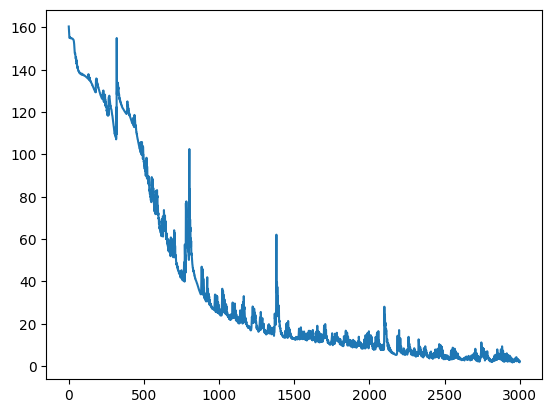

In [36]:
plt.plot(loss)

plt.plot(losses)

In [37]:
N = 100
M = 150
U = model.predict().detach().numpy().reshape([N,M]).T
X = model.X.detach().numpy().reshape([N,M]).T
T = model.T.detach().numpy().reshape([N,M]).T
mdic = {"U": U, "T": T, "X": X, "loss": "loss"}
U.shape, X.shape

((150, 100), (150, 100))

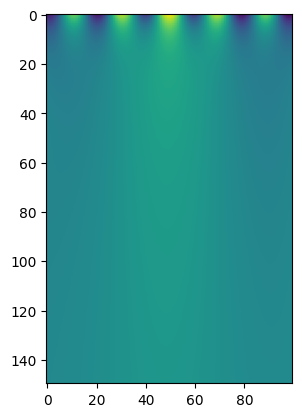

In [41]:
plt.imshow(U)

# Hyperbolic

In [7]:
hyperbolic = Hyperbolic()

model = ODESolver(hidden_dimensions = [2,20,20,20,20,20,1],
                  activation_fn = nn.Tanh(),
                  N=100,
                  M = 150,
                  tmax = 2.0,
                  verbose=False,
                  pde = hyperbolic)

N_EPOCHS = 3000
loss = model.train(N_EPOCHS)

epoch 2995 | loss: 0.0050: 100%|██████████| 3000/3000 [03:18<00:00, 15.10it/s]


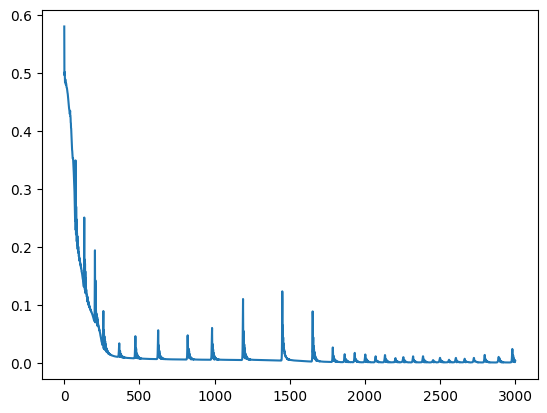

In [8]:
plt.plot(loss)

In [11]:
N = 100
M = 150
U = model.predict().detach().numpy().reshape([N,M]).T
X = model.X.detach().numpy().reshape([N,M]).T
T = model.T.detach().numpy().reshape([N,M]).T
mdic = {"U": U, "T": T, "X": X, "loss": "loss"}
U.shape, X.shape

((150, 100), (150, 100))

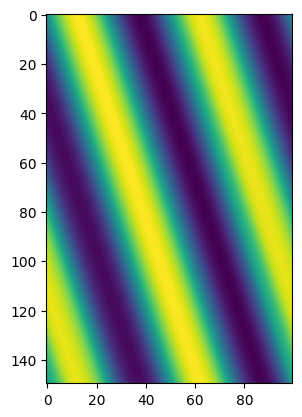

In [12]:
plt.imshow(U)

# Advection

In [2]:
advection = Advection()

tmax = 1.6037/torch.pi

model = ODESolver(hidden_dimensions = [2,20,20,20,20,20,1],
                  activation_fn = nn.Tanh(),
                  N=100,
                  M = 150,
                  tmax = tmax,
                  verbose=False,
                  pde = advection)

N_EPOCHS = 3000
loss = model.train(N_EPOCHS)

epoch 2995 | loss: 0.0503: 100%|██████████| 3000/3000 [09:06<00:00,  5.49it/s]


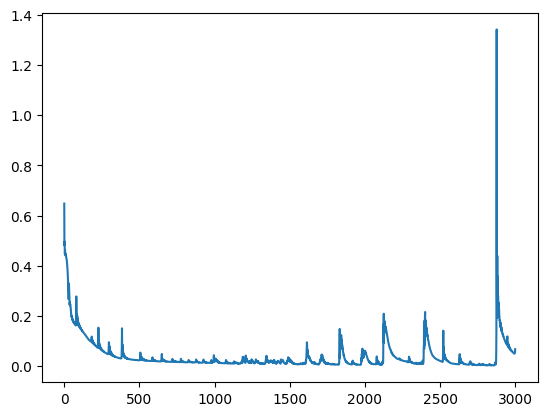

In [3]:
plt.plot(loss)

In [4]:
N = 100
M = 150
U = model.predict().detach().numpy().reshape([N,M]).T
X = model.X.detach().numpy().reshape([N,M]).T
T = model.T.detach().numpy().reshape([N,M]).T
x = model.x.detach().numpy()
mdic = {"U": U, "T": T, "X": X, "loss": loss}
U.shape, X.shape

((150, 100), (150, 100))

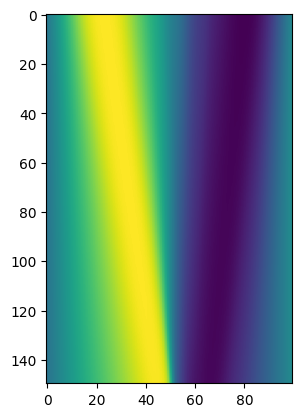

In [5]:
plt.imshow(U)